# Intro to Image Processing and Computer Vision with Applications of Deep Neural Networks

## Intro to Image Processing

In [1]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import random
# Import OpenCV, a computer vision library
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.gray()

<Figure size 432x288 with 0 Axes>

Digital Images are just represented as matrices of pixels of varying intensities. For example consider the very simple binary "image" of a plus sign represented by the following matrix:

$$\begin{bmatrix}
0&1&0\\
1&1&1\\
0&1&0\\
\end{bmatrix}$$

In [2]:
height = 500
width = 500
# Create dummy image full of zeros
img = np.zeros((height, width)).astype("uint8")

In [3]:
plt.axis('off')
plt.imshow(img)

In [4]:
# Add white square
square_size = 50
img[(height // 2) - square_size : (height // 2) + square_size, 
     (width  // 2) - square_size : (width // 2) + square_size] = 255

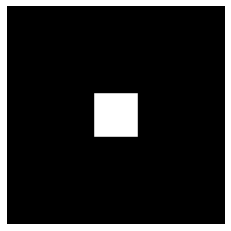

In [5]:
plt.axis('off')
plt.imshow(img)

In [6]:
# Can you guess what this will do?
square_size = 20

img[(height // 4) - square_size : (height // 4) + square_size, 
     (width  // 4) - square_size : (width // 4) + square_size] = 255 // 4 

img[( 3 * height // 4) - square_size : (3 * height // 4) + square_size, 
     (3 * width  // 4) - square_size : (3 * width // 4) + square_size] = 255 // 2 

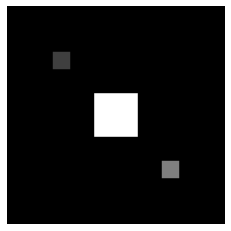

In [7]:
plt.axis('off')
plt.imshow(img)

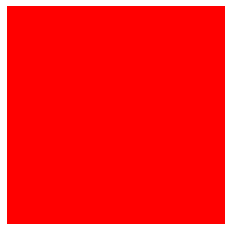

In [8]:
red = np.array([255, 0, 0]).astype("uint8")
red_img = np.zeros((500, 500, 3), "uint8")
red_img += red
plt.axis("off")
plt.imsave("red.jpg", red_img)
plt.imshow(red_img)

In [9]:
# Can you guess what this will do?
red_img += np.array([0, 0, 255]).astype("uint8")

plt.axis("off")
plt.imsave("red.jpg", red_img)
plt.imshow(red_img)

In [10]:
def draw_rose(k, n=200, alpha=0.4, color='xkcd:deep rose'):
    '''
    Function to draw epicycloids. 
    See 
    https://en.wikipedia.org/wiki/Epicycloid
    https://mathworld.wolfram.com/Epicycloid.html
    Inspired by/based on 
    https://www.johndcook.com/blog/2020/04/24/envelopes-of-epicycloids/ 
    '''
    x = np.linspace(0,  20 * np.pi, n)
    plt.axes().set_aspect(1)
    plt.rcParams['axes.facecolor'] = 'black'
    plt.axis('off')
    plt.plot(np.cos(k*x)*np.cos(x), np.cos(k*x)*np.sin(x), color, alpha=alpha)
    plt.show()

In [11]:
draw_rose(5, n=100)

In [12]:
draw_rose(1.5, color='xkcd:azure')

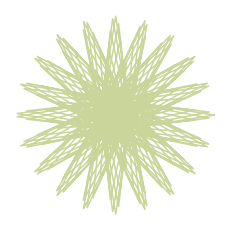

In [13]:
draw_rose(10, color='xkcd:ugly green')

## Now let's do something more intersting with actual photos

In [14]:
bird_img = cv2.imread("./data/bird.jpg", 1)

In [15]:
# images are really matrices!
bird_img

array([[[114, 185, 152],
        [102, 175, 143],
        [ 99, 177, 146],
        ...,
        [ 29, 126,  76],
        [ 31, 128,  78],
        [ 26, 119,  74]],

       [[120, 189, 156],
        [115, 189, 155],
        [112, 188, 157],
        ...,
        [ 26, 123,  73],
        [ 29, 125,  78],
        [ 26, 119,  74]],

       [[123, 191, 156],
        [128, 198, 162],
        [120, 193, 161],
        ...,
        [ 26, 120,  73],
        [ 25, 119,  72],
        [ 26, 119,  74]],

       ...,

       [[ 38, 113,  81],
        [ 44, 119,  87],
        [ 44, 119,  87],
        ...,
        [ 48,  96,  78],
        [ 47,  95,  77],
        [ 48,  93,  76]],

       [[ 42, 117,  85],
        [ 47, 122,  90],
        [ 46, 121,  89],
        ...,
        [ 45,  93,  75],
        [ 46,  94,  76],
        [ 51,  96,  79]],

       [[ 46, 121,  89],
        [ 49, 124,  92],
        [ 48, 123,  91],
        ...,
        [ 40,  88,  70],
        [ 43,  91,  73],
        [ 50,  98,  80]]

In [16]:
bird_img.shape

(599, 449, 3)

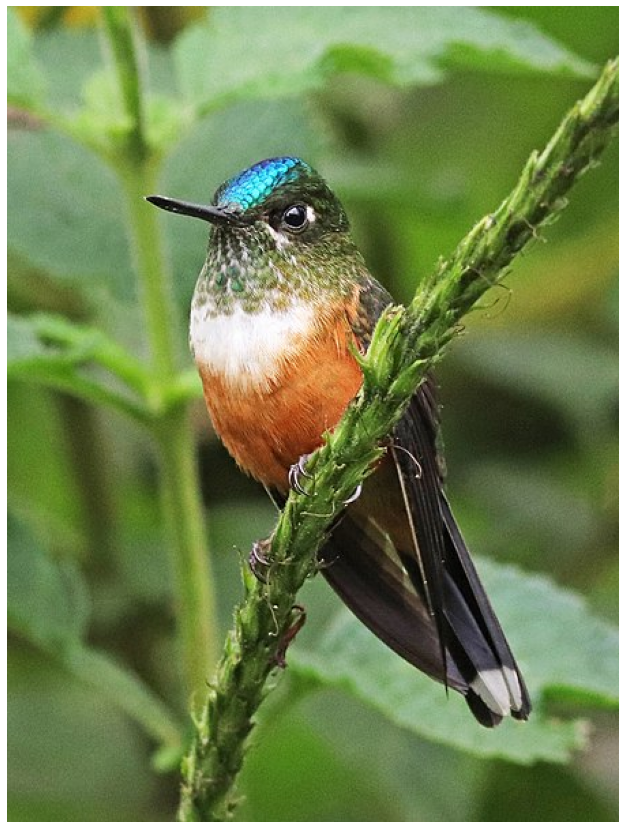

In [17]:
fig, axs = plt.subplots(1,1,figsize=(15,15))
plt.axis('off')
# Note color channel swap
plt.imshow(cv2.cvtColor(bird_img, cv2.COLOR_BGR2RGB))

In [18]:
bird_img = cv2.cvtColor(bird_img, cv2.COLOR_BGR2RGB)

In [19]:
r = bird_img[:,:,0]
g = bird_img[:,:,1]
b = bird_img[:,:,2]

In [20]:
fig, axs = plt.subplots(3,1,figsize=(15,15))
plt.subplot(131),plt.imshow(r),plt.title('Red')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(g),plt.title('Green')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(b),plt.title('Blue')
plt.xticks([]), plt.yticks([])
plt.show()

In [21]:
r = np.zeros_like(bird_img)
g = np.zeros_like(bird_img)
b = np.zeros_like(bird_img)

r[:,:,0] = bird_img[:,:,0]
g[:,:,1] = bird_img[:,:,1]
b[:,:,2] = bird_img[:,:,2]

In [22]:
fig, axs = plt.subplots(3,1,figsize=(15,15))
plt.subplot(131),plt.imshow(r),plt.title('Red')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(g),plt.title('Green')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(b),plt.title('Blue')
plt.xticks([]), plt.yticks([])
plt.show()

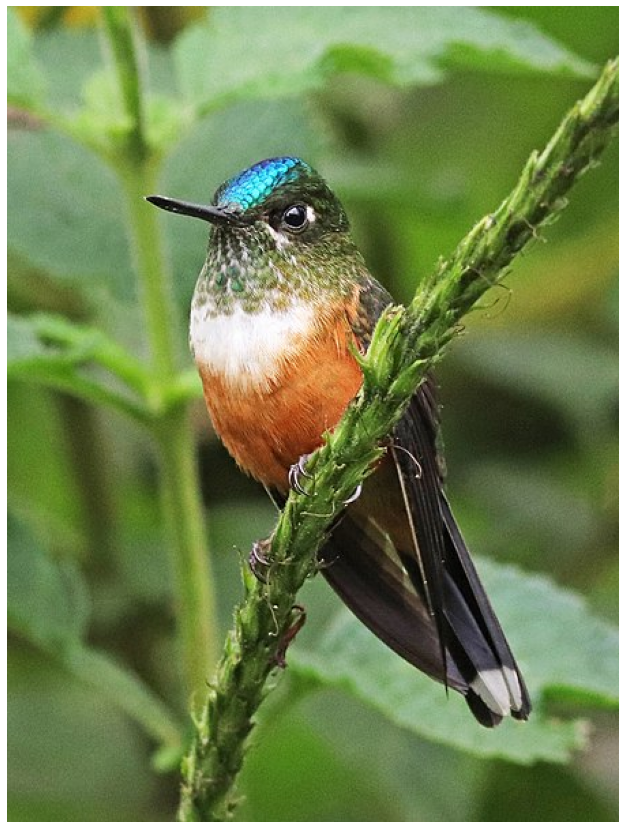

In [23]:
test_recombine = b + g + r
fig, axs = plt.subplots(1,1,figsize=(15,15))
plt.axis('off')
plt.imshow(test_recombine)

In [26]:
def swap_chans(img, swapId):
    split = cv2.split(img)
    if swapId == 0:
        img = cv2.merge([split[1], split[2], split[0]])
    elif swapId == 1:
        img = cv2.merge([split[2], split[0], split[1]])
    elif swapId == 2:
        img = cv2.merge([split[1], split[0], split[2]])
    elif swapId == 3:
        img = cv2.merge([split[2], split[1], split[0]])
    elif swapId == 4:
        img = cv2.merge([split[0], split[2], split[1]])
    return img

def hue_rotate(img, degrees):
    '''Given an image, this function rotates the image 
       by the given number of degrees in the hue plane of 
       opencv's HSV space. It returns the resulting image'''
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_cpy = img.copy()
    for y in range(len(img)):
        for x in range(len(img[0])):
            img_cpy[y, x, 0] = (int(img_cpy[y, x, 0]) + int(degrees)) % 180
    return cv2.cvtColor(img_cpy, cv2.COLOR_HSV2BGR)
    


def color_quantize(img, numCols):
    '''Given an image, this function runs k-clustering on the image's 
       colors with k=numCols clusters and then sets ever pixel in a given cluster 
       to the centroid color vector of the cluster. It then returns the color quantied image.'''
    # Reshape the image matrix to a lst of each idivid pixel 
    Z = img.reshape((-1, 3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = numCols
    ret,label,center=cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    return res2

(<AxesSubplot:title={'center':'Swapped'}>,
 Text(0.5, 1.0, 'Swapped'))

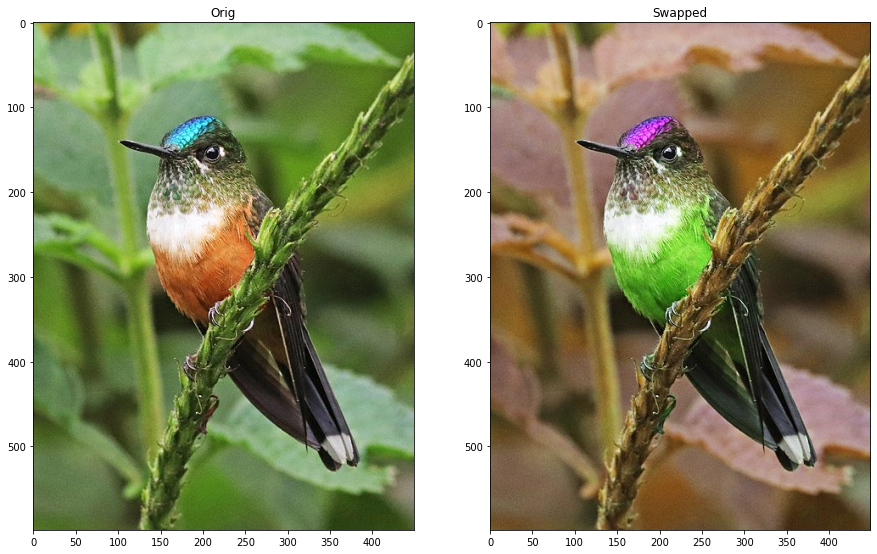

In [27]:
bird_img_swap = swap_chans(bird_img, random.randint(0, 5))
fig, axs = plt.subplots(1,2,figsize=(15,15))
plt.subplot(121),plt.imshow(bird_img),plt.title('Orig')
plt.subplot(122),plt.imshow(bird_img_swap),plt.title('Swapped')

# Now let's try some more interesting operations

Gaussian blurring "smoothes" an image by setting a pixel's value to the average of its surroundings. For example consider the matrix $K$ below which we will refer to as a kernel.
$$K = \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}$$

The operation works like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take the average, and replace the central pixel with the new average value. This operation is continued for all the pixels in the image. 

In [28]:
img_alex = cv2.imread("./data/alex.jpg", 1)

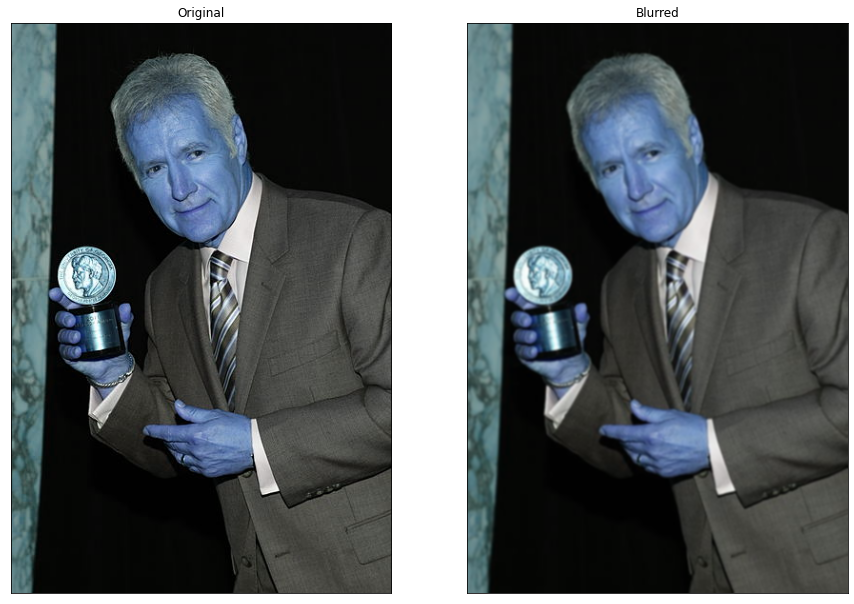

In [29]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
blur = cv2.GaussianBlur(img_alex,(5,5),0)
plt.subplot(121),plt.imshow(img_alex),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

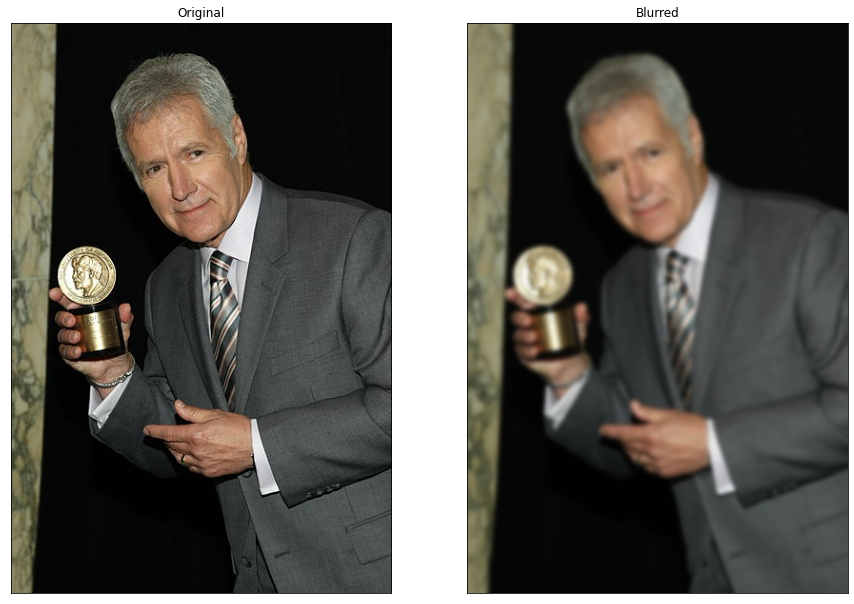

In [30]:
img_alex = cv2.cvtColor(img_alex, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(2,2,figsize=(15,15))
blur = cv2.GaussianBlur(img_alex,(13,13),0)
plt.subplot(121),plt.imshow(img_alex),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [31]:
apollo_img = cv2.imread("./data/apollo 17_boulder_noisy.tif") 

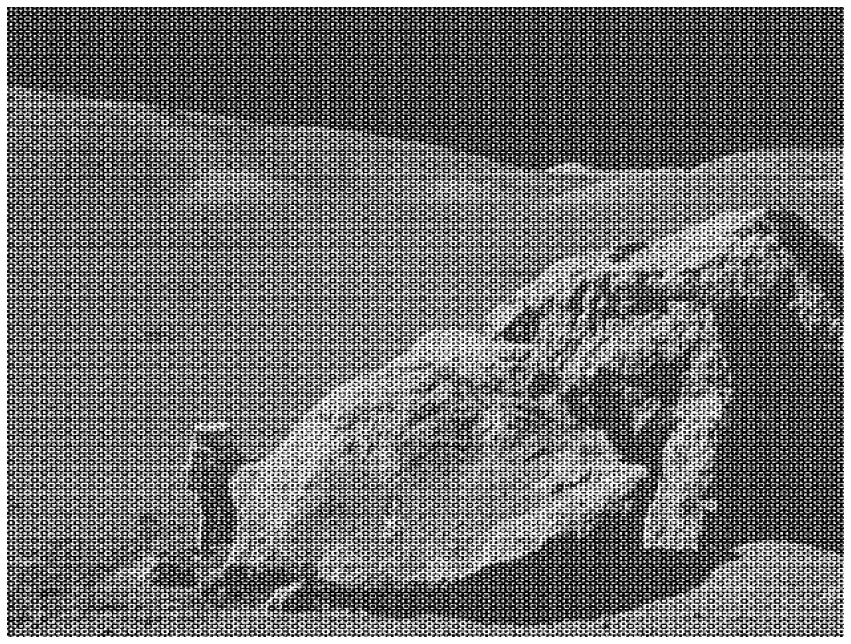

In [32]:
fig, axs = plt.subplots(1,1,figsize=(15,15))
plt.axis('off')
plt.imshow(apollo_img)

In [36]:
apollo_img = cv2.cvtColor(apollo_img, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(2,2,figsize=(15,15))
blur = cv2.GaussianBlur(apollo_img,(13,13),0)
plt.subplot(121),plt.imshow(apollo_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [38]:
height, width = img.shape
fig, axs = plt.subplots(2,2,figsize=(15,15))
# Apply a large Gaussian filter to get the shading pattern
blur = cv2.GaussianBlur(img,(height//3, height//3),0)
# Divide out the shading pattern
restored = img / (blur)
# Rescale the corrected image to the correct intensity levels
restored = 255 * (restored - np.min(restored)) / (np.max(restored) - np.min(restored))
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur),plt.title('Shading Pattern')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(restored),plt.title('Restored')
plt.xticks([]), plt.yticks([])
plt.show()

In [39]:
img = cv2.imread("./data/checkerboard1024-shaded.tif", 0)
plt.gray()

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

fig, axs = plt.subplots(2,1,figsize=(15,15))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(laplacian),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])
plt.show()

plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

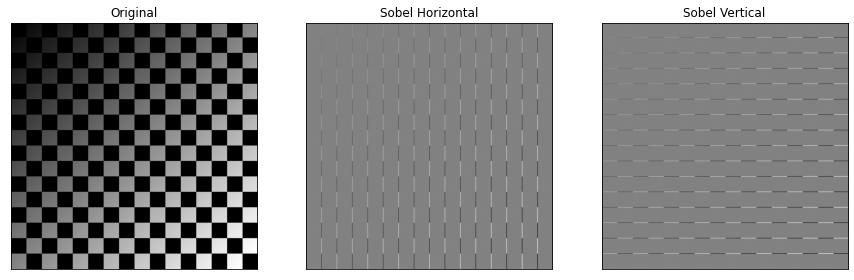

In [40]:
img = cv2.imread("./data/checkerboard1024-shaded.tif", 0)
plt.gray()

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

fig, axs = plt.subplots(2,2,figsize=(15,15))

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(sobelx),plt.title('Sobel Horizontal')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(sobely),plt.title('Sobel Vertical')
plt.xticks([]), plt.yticks([])
plt.show()

plt.show()

These results make sense because the Sobel filters above basically act as directional derivatives that detect edges along an axis. We can see that within the chess squares, the filtered values are low and when we cross an edge as we move along the $x$ direction, we see a signed change when we cross from a black square to white square (positive) or white to black (negative). A similar effect is seen for moving along the $y$ axis. 

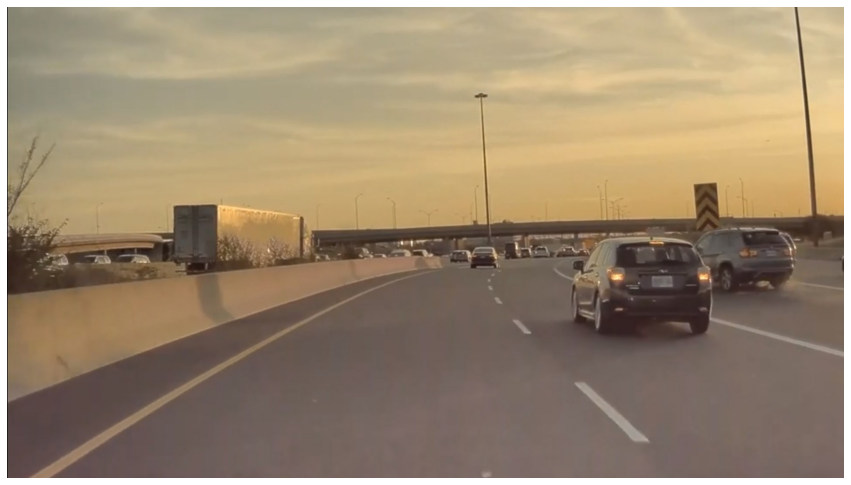

In [41]:
img = cv2.imread('./data/highway.jpg',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1,1,figsize=(15,15))
plt.axis("off")
plt.imshow(img)

In [42]:
img = cv2.imread('./data/highway.jpg',0)
edges = cv2.Canny(img,100,120)
fig, axs = plt.subplots(1,2,figsize=(50,50))
plt.subplot(211),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Frequency Domain

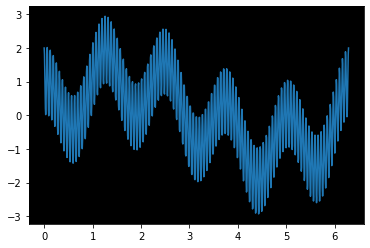

In [52]:
x = np.linspace(0, 2 * np.pi, 1000)
a = np.sin(x)
b = np.cos(100 * x)
c = np.cos(-5 * x)
sig = a + b + c

plt.plot(x, sig)

In [53]:
plt.plot(x, sig, x ,a)

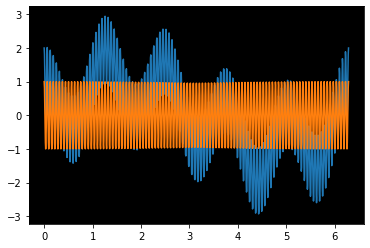

In [54]:
plt.plot(x, sig, x ,b)

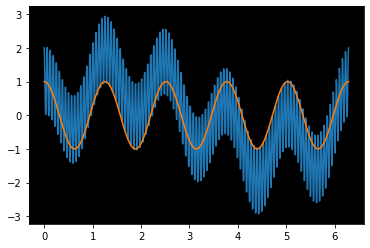

In [55]:
plt.plot(x, sig, x ,c)

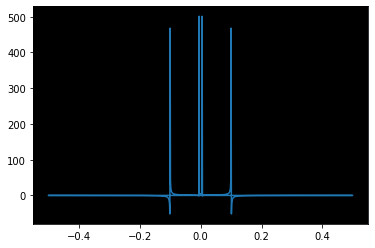

In [56]:
spect = np.fft.fft(sig)
freq = np.fft.fftfreq(sig.shape[-1])
plt.plot(freq, spect.real)

In [59]:
img = cv2.imread("./data/checkerboard1024-shaded.tif", 0)
plt.axis("off")
plt.imshow(img)

In [60]:
# Take the discrete fourer transform
f = np.fft.fft2(img)
# Peform the shift to get the zero frequency component (DC component) to the center
fshift = np.fft.fftshift(f)
# Take and scale the log so we cna better see the spectrum 
# (also add a small number to prevent log(0)) since we're just using this for 
# visualizing, this is fine. 
magnitude_spectrum = 20*np.log(np.abs(fshift)+ 0.0001)

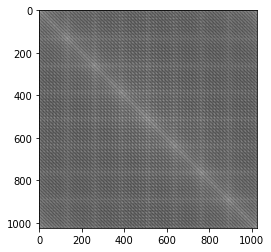

In [61]:
plt.imshow(magnitude_spectrum)

In [62]:
'''
A function to generate a 2D Gaussian filter
'''
def gaussian(height, width, sigma):
    coeff = 1.0 / (2 * np.pi * sigma**2)
    array = np.zeros((height, width))
    for row in range(height):
        for col in range(width):
            array[row][col] = coeff * np.exp(- 1 * ((row - height/2)**2 + (col - width/2)**2) / (2 * sigma**2))
    return array

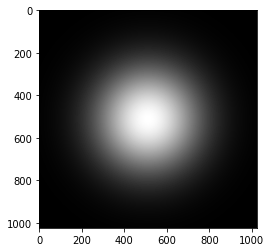

In [63]:
# Create a gaussian filter and look at its image representation
# to see that it worked correctly
height, width = img.shape
G = gaussian(height, width, height//6)
plt.imshow(G)

In [64]:
# Create a gaussian filter to lowpass filter the image 
G = gaussian(height, width, 3)
plt.imshow(G)

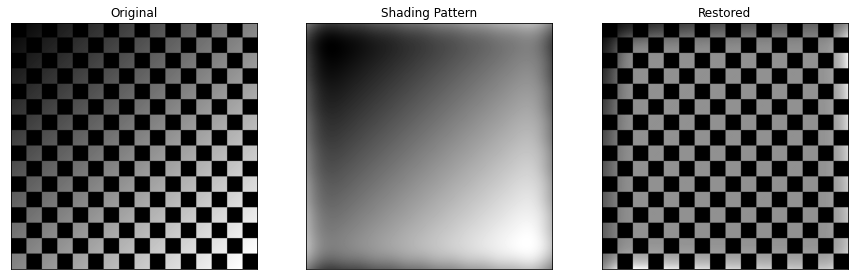

In [65]:
height, width = img.shape
fig, axs = plt.subplots(2,2,figsize=(15,15))
# Filter the spectrum with the gaussian:
filtered = fshift * G
f_ishift = np.fft.ifftshift(filtered)
# Perform the inverse shift to get the reconstructed image
img_new = np.fft.ifft2(f_ishift)
img_new = np.real(img_new)

# Divide out the shading pattern
restored = img / (img_new)
# Rescale the corrected image ot the correct intensity levels
restored = 255 * (restored - np.min(restored)) / (np.max(restored) - np.min(restored))
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_new),plt.title('Shading Pattern')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(restored),plt.title('Restored')
plt.xticks([]), plt.yticks([])
plt.show()

## Vision

Image formation involves the projection of 3D points onto a 2D image plane. A camera can be mathematically thought of as the matrix which performs that projection. Instead of 3D to 2D we often use [homogenous](https://en.wikipedia.org/wiki/Homogeneous_coordinates) where the last coordinate is used for scaling, so we map 4D to 3D. The homogenous coordinate also formalizes the idea of the [point at infinity](https://en.wikipedia.org/wiki/Point_at_infinity) which is where parallel lines intersect in projective geometry. Below is an example of how iamges are formed. 

![IBVH](./data/tree.png)

Below are the equations that show how images are formed. $C$ is the intrinsic matrix which encodes the focal length and sensor size, $T$ is the camera translation (position) and $R$ is the camera rotation (orientation).

![IBVH](./data/intrinsic.gif)
![IBVH](./data/math.gif)

In projective geometry, parallel lines intersect at $\infty$.

![IBVH](./data/inf.png)
![IBVH](./data/tracks.jpg)

If we know the camera matrix values which we can determine via calibration and key point matching, we can invert the process of image formation to reconstruct a 3D scene using an algorithm like [image based visual hulls](https://en.wikipedia.org/wiki/Visual_hull).

![IBVH](./data/SilhouetteCones.jpg)
![IBVH](./data/IBVH.png)

This process is part of the pipeline we used at my team at Intel for creating "volumetric video" [in sports](https://www.intel.com/content/www/us/en/sports/sports-overview.html) and [film](https://newsroom.intel.com/video-archive/video-2018-ces-intel-studios-debut-volumetric-video-clips-clip-2/).

## Machine Learning

Several intersting ML techinques have revolutionized image processing. This includes [image classification](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), [object detection](https://papers.nips.cc/paper/5638-faster-r-cnn-towards-real-time-object-detection-with-region-proposal-networks.pdf), [style transfer](http://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf), [image captioning](https://cs.stanford.edu/people/karpathy/sfmltalk.pdf), [image generation](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf).